In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [2]:
TrainingImagePath='D:\omark\Desktop\دراسة\مشروع التخرج\Face-Images\Face Images\Final Training Images'
 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)
 
# Defining pre-processing transformations on raw images of testing data
# No transformations are done on the testing images
test_datagen = ImageDataGenerator()
 
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 
 
# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        TrainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')
 
# Printing class labels for each face
test_set.class_indices

Found 365 images belonging to 22 classes.
Found 365 images belonging to 22 classes.


{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face17': 8,
 'face18': 9,
 'face19': 10,
 'face2': 11,
 'face20': 12,
 'face3': 13,
 'face4': 14,
 'face5': 15,
 'face6': 16,
 'face7': 17,
 'face8': 18,
 'face9': 19,
 'mo': 20,
 'omar': 21}

In [3]:
TrainClasses=training_set.class_indices
 
# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName
 
# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)
 
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)
 
# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face17', 9: 'face18', 10: 'face19', 11: 'face2', 12: 'face20', 13: 'face3', 14: 'face4', 15: 'face5', 16: 'face6', 17: 'face7', 18: 'face8', 19: 'face9', 20: 'mo', 21: 'omar'}

 The Number of output neurons:  22


In [4]:
classifier= Sequential()

classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))
 
'''# STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''############## ADDITIONAL LAYER of CONVOLUTION for better accuracy #################'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
classifier.add(MaxPool2D(pool_size=(2,2)))

#classifier.add(Convolution2D(128, kernel_size=(5, 5), strides=(1, 1), activation='relu'))
 
#classifier.add(MaxPool2D(pool_size=(2,2)))
 
'''# STEP--3 FLattening'''
classifier.add(Flatten())
 
'''# STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))
 
classifier.add(Dense(OutputNeurons, activation='softmax'))
 
'''# Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



 
###########################################################
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Starting the model training
history = classifier.fit(
                    training_set,
                    steps_per_epoch=len(training_set),
                    epochs=18,
                    validation_data=test_set,
                    validation_steps=len(test_set)
)
 
EndTime=time.time()
print("###### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes ######')


classifier.summary()


Epoch 1/18
12/12 [==============================] - 8s 684ms/step - loss: 53.1592 - accuracy: 0.0575 - val_loss: 2.9378 - val_accuracy: 0.1452
Epoch 2/18
12/12 [==============================] - 5s 405ms/step - loss: 2.8754 - accuracy: 0.1726 - val_loss: 2.6923 - val_accuracy: 0.1836
Epoch 3/18
12/12 [==============================] - 5s 442ms/step - loss: 2.3100 - accuracy: 0.3178 - val_loss: 1.8066 - val_accuracy: 0.5233
Epoch 4/18
12/12 [==============================] - 5s 396ms/step - loss: 1.5880 - accuracy: 0.5123 - val_loss: 1.1515 - val_accuracy: 0.6767
Epoch 5/18
12/12 [==============================] - 5s 452ms/step - loss: 1.1670 - accuracy: 0.6767 - val_loss: 0.9947 - val_accuracy: 0.7589
Epoch 6/18
12/12 [==============================] - 5s 452ms/step - loss: 0.8889 - accuracy: 0.7616 - val_loss: 0.6005 - val_accuracy: 0.8055
Epoch 7/18
12/12 [==============================] - 6s 469ms/step - loss: 0.6370 - accuracy: 0.8082 - val_loss: 0.3474 - val_accuracy: 0.9260
Epoch

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


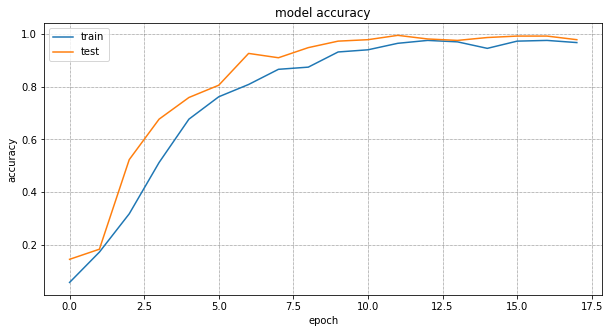

In [5]:
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy



print(history.history.keys())
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(color='k', linewidth=.5, linestyle=':')

plt.show()

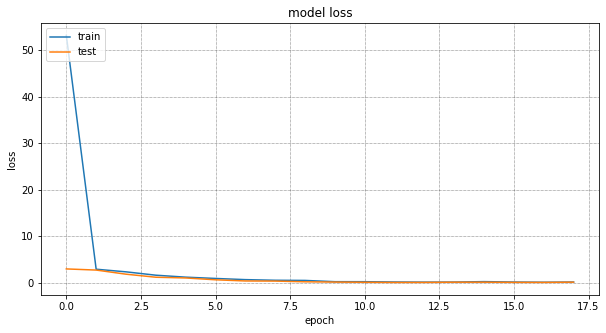

In [6]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(color='k', linewidth=.5, linestyle=':')

plt.show()

In [7]:
import numpy as np
from keras.preprocessing import image
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
cap = cv2.VideoCapture(0)
while True:
    
    # Read the frame
    __, img = cap.read()
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Detect the faces
    faces = face_cascade.detectMultiScale(gray , 1.1, 4)
    
    test_image=image.load_img(faces,target_size=(64, 64))
    test_image=image.img_to_array(test_image)
    
    test_image=np.expand_dims(test_image,axis=0)
 
    result=classifier.predict(test_image,verbose=0)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img,ResultMap[np.argmax(result)],(x, y - 10), cv2.FONT_HERSHEY_DUPLEX, 1, (0, 0, 200), 2)
                                  # Display
    cv2.imshow('img', img)
    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
# Release the VideoCapture object
cap.release()

#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\objdetect\src\cascadedetect.cpp:1658: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [10]:
import numpy as np
from keras.preprocessing import image
 
ImagePath=r'D:\omark\Desktop\دراسة\مشروع التخرج\Face-Images\Face Images\Final Testing Images\Omar1\b.jpeg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)
 
test_image=np.expand_dims(test_image,axis=0)
 
result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)
 
print('####'*10)
print('Prediction is: ',ResultMap[np.argmax(result)])

########################################
Prediction is:  omar


In [19]:
# Import libraries
import cv2
import numpy as np

# Video capture using WebCam
cap = cv2.VideoCapture(0)
        
# print a feedback
print('Camera On')

# Load face detection classifier
# Load face detection classifier ~ Path to face & eye cascade
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")  # Pre train model

while True:
  # Original frame ~ Video frame from camera
  ret, frame = cap.read()  # Return value (true or false) if the capture work, video frame
  
  # Convert original frame to gray
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
  # Get location of the faces in term of position
  # Return a rectangle (x_pos, y_pos, width, height)
  faces = face_cascade.detectMultiScale(gray, 1.2, 5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE) 
  
  # Detect faces
  for (x, y, w, h) in faces:
     # Draw rectangle in the face
     cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 53, 18), 2)  # Rect for the face
     
  # Load video frame
  cv2.imshow('Video Frame', frame)
  
  # Wait 1 millisecond second until q key is press
  # Get a frame every 1 millisecond
  if cv2.waitKey(1) == ord('q'):
     # Print feedback
     print('Camera Off')
     break
     
# Close windows
cap.release()  # Realise the webcam
cv2.destroyAllWindows()  # Destroy all the windows

Camera On


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\objdetect\src\cascadedetect.cpp:1658: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'
